In [1]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import concurrent.futures
from draw import draw_bounding_box_on_image as draw
from PIL import Image

In [2]:
# Initialize the COCO api for instance annotations

coco_path = r"C:\Users\sky66\fiftyone\coco-2017\raw\annotations\\"

val=COCO(coco_path+"instances_val2017.json")
train=COCO(coco_path+"instances_train2017.json")

# Load the categories in a variable
# catIDs = coco.getCatIds()
# cats = coco.loadCats(catIDs)

val_catIds = val.getCatIds(catNms=["person"]) 
val_imgIds = val.getImgIds(catIds=val_catIds)

train_catIds = train.getCatIds(catNms=["person"]) 
train_imgIds = train.getImgIds(catIds=train_catIds)

# img = coco.loadImgs(imgIds[0])[0]

loading annotations into memory...
Done (t=0.61s)
creating index...
index created!
loading annotations into memory...
Done (t=16.62s)
creating index...
index created!


In [3]:
def data(imgIds, catIds, coco, name):
    for img in imgIds:
        img = coco.loadImgs(img)[0]
        if img['file_name']==name:
            break  
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)        
    anns = coco.loadAnns(annIds)          
    return anns[0]

def vw(name):
    name = name.split("_")
    isTrain = True if name[0]=="train" else False
    if isTrain:
        d = data(train_imgIds, train_catIds, train, name[1])
        b = train.annToMask(d)
    else:
        d = data(val_imgIds, val_catIds, val, name[1])
        b = val.annToMask(d)
    s = b.shape
    x, y, w, h = d["bbox"]
    x0, y0, x1, y1 = [int(r) for r in [y, x, y+h, x+w]]
    ymin, xmin, ymax, xmax = y/s[0], x/s[1], (y+h)/s[0], (x+w)/s[1]
    return ymin, xmin, ymax, xmax

In [4]:
# Only save the images that train unte model will use for what detection  model will use.
imgPath = r"C:\Users\sky66\fiftyone\coco-2017\raw\img\\"
imgs = list(os.listdir(imgPath))

train_000000000036.jpg
[0.25451562499999997, 0.3483991683991684, 0.9813749999999999, 0.9941580041580043]


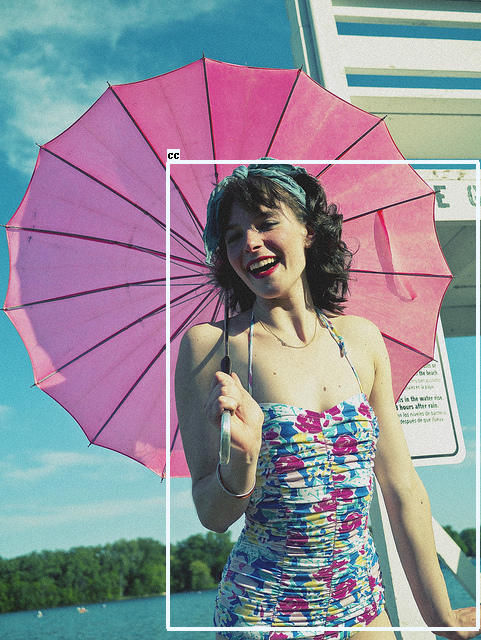

In [5]:
ids = 0
print(imgs[ids])
print([*vw(imgs[ids])])
a = cv2.imread(os.path.join(r"C:\Users\sky66\fiftyone\coco-2017\raw\train2017",imgs[ids].split("_")[1]))
a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
draw(a,*vw(imgs[ids]), display_str_list=["CC"])

val_000000054654.jpg
[0.07865625000000001, 0.24383292383292382, 0.9887656250000001, 0.9116953316953317]


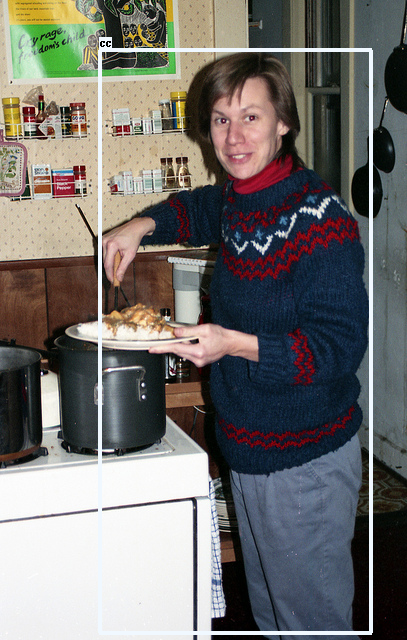

In [6]:
ids = 2305
print(imgs[ids])
print([*vw(imgs[ids])])
a = cv2.imread(os.path.join(r"C:\Users\sky66\fiftyone\coco-2017\raw\val2017",imgs[ids].split("_")[1]))
a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
draw(a,*vw(imgs[ids]), display_str_list=["CC"])

In [7]:
def save(name): # save bbox
    return ",".join([str(_) for _ in [name, *vw(name)]])+"\n"

In [8]:
save(imgs[0])

'train_000000000036.jpg,0.25451562499999997,0.3483991683991684,0.9813749999999999,0.9941580041580043\n'

In [76]:
S = ""
for R in imgs:
    S += save(R)

In [77]:
with open("bbox.csv", "w", encoding="utf8") as f:
    f.write(S)

In [9]:
def stored(InewPath, ids):
        name = imgs[ids]
        name1 = name.split("_")
        path = trp if name1[0]=="train" else vlp
        i = cv2.imread(os.path.join(path, name1[1]))
        i = cv2.resize(i, (640,640))
        cv2.imwrite(nlp+"\\"+name, i)  

In [10]:
trp = r"C:\Users\sky66\fiftyone\coco-2017\raw\train2017"
vlp = r"C:\Users\sky66\fiftyone\coco-2017\raw\val2017"
nlp = r"C:\Users\sky66\fiftyone\coco-2017\raw\nlp"

val_000000054654.jpg
[0.07865625000000001, 0.24383292383292382, 0.9887656250000001, 0.9116953316953317]


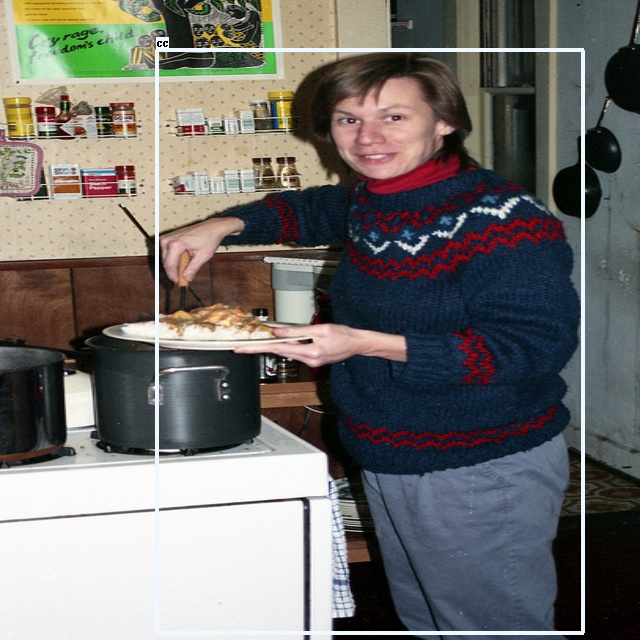

In [11]:
ids = 2305
stored(nlp, ids)
print(imgs[ids])
print([*vw(imgs[ids])])
a = cv2.imread(os.path.join(nlp, imgs[ids]))
a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
draw(a,*vw(imgs[ids]), display_str_list=["CC"])

In [12]:
# save img
tar = imgs
Max = 30
for n in range(0,len(tar),Max):
    with concurrent.futures.ThreadPoolExecutor(max_workers=Max) as executor:
        for i in range(n, n+len(tar[n:n+Max])):
            executor.submit(stored, nlp, i) 